## The Programming Historian 
# Introduction to stylometry with Python

#### This jupyter notebook is based on François Dominic Laramée, "Introduction to stylometry with Python," The Programming Historian 7 (2018), https://doi.org/10.46430/phen0078.

In [25]:
import os
import nltk
import math
import matplotlib.pyplot as plt

%matplotlib inline

## Prepare files

In [5]:
# make the Vasari files
list_of_files = os.listdir('./data/results/Dante')
#list_of_files

In [6]:
# build lists of filenames per author to the corpus

Vasari = list()
Bartoli = list()
Borghini = list()
Vcopy = list()
Giambullari = list()
unkown = list()


for i in list_of_files:
    if i.startswith('Bartoli'):
        Bartoli.append(i)
    
    if i.startswith('Borghini'):
        Borghini.append(i)
        
    if i.startswith('Giambullari'):
        Giambullari.append(i)
        
    if i.startswith('Vasari'):
        Vasari.append(i)
        
    if i.startswith('Vcopy'):
        Vcopy.append(i)
        
    if i.startswith('unkown'):
        unkown.append(i)
len(Giambullari)

6

In [7]:
# build dictionary with the whole corpus

Vpapers = {
    'Bartoli': Bartoli, 
    'Borghini': Borghini, 
    'Giambullari': Giambullari,
    'Vasari': Vasari, 
    'Vcopy': Vcopy,
    'unkown': unkown
}

#Vpapers

### function to read Vasari files

In [8]:
# A function that compiles all of the text files associated with a single author 
# into a single string

def read_files_into_stringV(filenames):
    strings = []
    for filename in filenames:
        with open('data/results/Dante/' + filename) as f:
            strings.append(f.read())
    return '\n'.join(strings)

In [9]:
# Make a dictionary out of the authors' corpora
authorsV = list(Vpapers.keys())
files_by_author = {}

for author in authorsV:
    files_by_author[author] = read_files_into_stringV(eval(author))

In [10]:
for author in authorsV:
    print(files_by_author[author][:100])

Molto Magnifico Signor Cavaliere. Tanto quanto io mi rallegro, che voi con l’aver finita la gran sal
Magnifico messer Giorgio. Come io son giunto in villa, la prima cosa io ho pensato un poco allo scri
Messer Giorgio mio caro. De’ tanti disagi e fastidii, che per me avete patiti, una sola satisfazzion
Molto Magnifico Messer Giovanni, Signor mio. Essi riceuto le 101 lastre ben condizionate, ecetto che
Illustrissimo e Eccellentissimo Signor mio. Io mi son tanto rallegrato della riforma, fatta a l’oper
Pesello e Francesco Peselli
Rare volte suole avvenire che i discepoli de’ maestri rari, se osservano


# First Stylometric Test: Mendenhall’s Characteristic Curves of Composition

## Vasari version

In [62]:
authorsV

['Bartoli', 'Borghini', 'Giambullari', 'Vasari', 'Vcopy', 'unkown']

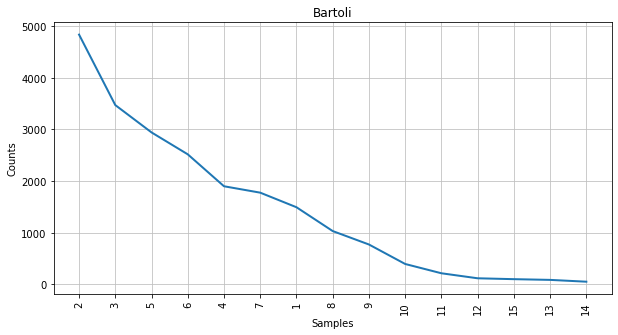

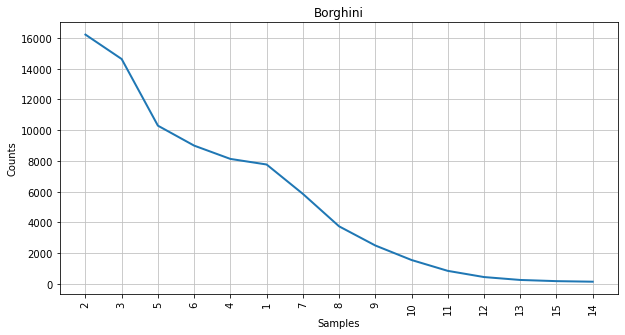

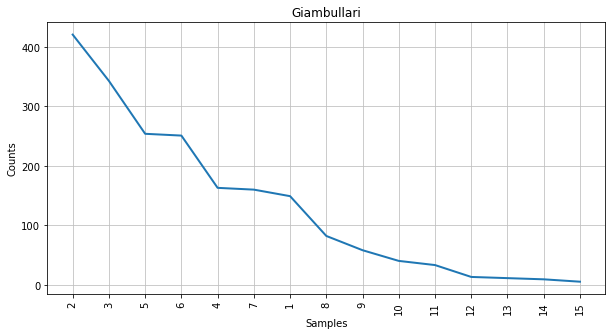

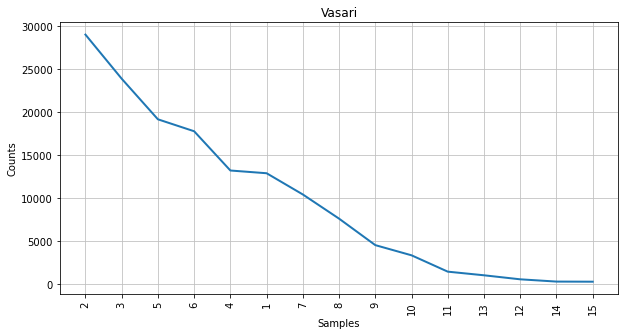

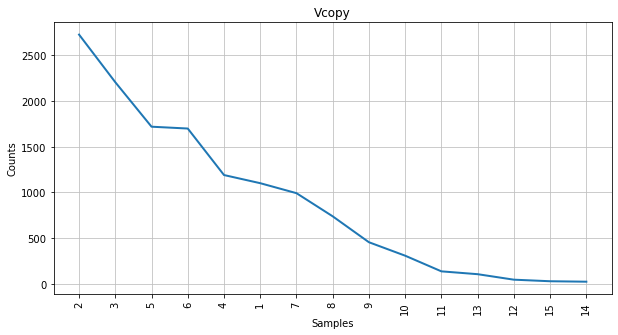

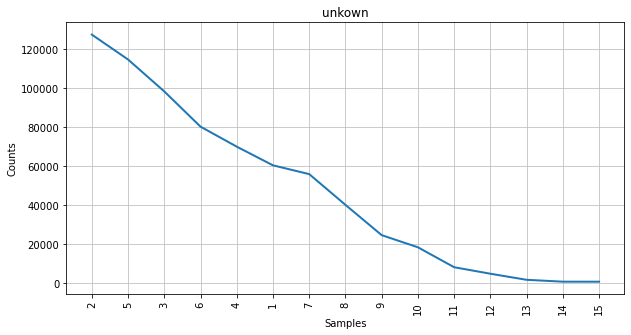

In [70]:
# Compare the disputed papers to those written by everyone,
# including the shared ones.

# Transform the authors' corpora into lists of word tokens
storage = {}
lives_by_author_tokens = {}
lives_by_author_length_distributions = {}
for author in authorsV:
    tokens = nltk.word_tokenize(files_by_author[author], language = 'italian')

    # Filter out punctuation
    lives_by_author_tokens[author] = ([token for token in tokens
                                            if any(c.isalpha() for c in token)])

    # Get a distribution of token lengths
    token_lengths = [len(token) for token in lives_by_author_tokens[author]]
    lives_by_author_length_distributions[author] = nltk.FreqDist(token_lengths)
    lives_by_author_length_distributions[author].plot(15,title=author)
    
    
    #store in variable
plt.show()    

In [86]:
#lives_by_author_length_distributions[author].plot(15,title=author)
lives_by_author_length_distributions['Vasari']

X = range(20)

#Vcopy
Y1= lives_by_author_length_distributions['Vasari'].values()
plt.plot(X, Y1,  label = "Vasari")

#Vcopy
Y2= lives_by_author_length_distributions['Giambullari'].values()
plt.plot(X, Y2, label = "Giambullari")

#Vcopy
Y3= lives_by_author_length_distributions['Vcopy'].values()
plt.plot(X, Y3, label = "Vcopy")
#Vcopy
Y4= lives_by_author_length_distributions['Borghini'].values()
plt.plot(X, Y4, label = "Borghini")
#Vcopy
Y5= lives_by_author_length_distributions['Bartoli'].values()
plt.plot(X, Y5, label = "Bartoli")



  
# Labeling the X-axis 
plt.xlabel('number of most common words') 
# Labeling the Y-axis 
plt.ylabel('Delta score') 
# Give a title to the graph
plt.title('Delta score distribution for every author concerning the authorship of the Lives') 
  
# Show a legend on the plot 
plt.legend() 
plt.show()

TypeError: 'dict_values' object is not subscriptable

In [87]:
lives_by_author_length_distributions['Giambullari'].values()

TypeError: 'dict_values' object is not subscriptable

# Second Stylometric Test: Kilgariff’s Chi-Squared Method

## Vasari version

In [12]:
authorsV

['Bartoli', 'Borghini', 'Giambullari', 'Vasari', 'Vcopy', 'unkown']

In [13]:
# Who are the authors we are analyzing?
authors = ("Vasari", "Borghini", "Giambullari", "Vcopy", "Bartoli")

# Lowercase the tokens so that the same word, capitalized or not,
# counts as one word
for author in authors:
    lives_by_author_tokens[author] = (
        [token.lower() for token in lives_by_author_tokens[author]])
lives_by_author_tokens["unkown"] = (
    [token.lower() for token in lives_by_author_tokens["unkown"]])

# Calculate chisquared for each of the two candidate authors
for author in authors:

    # First, build a joint corpus and identify the 500 most frequent words in it
    joint_corpus = (lives_by_author_tokens[author] +
                    lives_by_author_tokens["unkown"])
    joint_freq_dist = nltk.FreqDist(joint_corpus)
    most_common = list(joint_freq_dist.most_common(700))

    # What proportion of the joint corpus is made up
    # of the candidate author's tokens?
    author_share = (len(lives_by_author_tokens[author])
                    / len(joint_corpus))

    # Now, let's look at the 500 most common words in the candidate
    # author's corpus and compare the number of times they can be observed
    # to what would be expected if the author's papers
    # and the Disputed papers were both random samples from the same distribution.
    chisquared = 0
    for word,joint_count in most_common:

        # How often do we really see this common word?
        author_count = lives_by_author_tokens[author].count(word)
        disputed_count = lives_by_author_tokens["unkown"].count(word)

        # How often should we see it?
        expected_author_count = joint_count * author_share
        expected_disputed_count = joint_count * (1-author_share)

        # Add the word's contribution to the chi-squared statistic
        chisquared += ((author_count-expected_author_count) *
                       (author_count-expected_author_count) /
                       expected_author_count)

        chisquared += ((disputed_count-expected_disputed_count) *
                       (disputed_count-expected_disputed_count)
                       / expected_disputed_count)

    print("The Chi-squared statistic for candidate", author, "is", round(chisquared,3))

The Chi-squared statistic for candidate Vasari is 84265.326
The Chi-squared statistic for candidate Borghini is 64834.969
The Chi-squared statistic for candidate Giambullari is 3037.064
The Chi-squared statistic for candidate Vcopy is 23354.609
The Chi-squared statistic for candidate Bartoli is 29068.342


## The Chi-squared results different in number of common words
### joint_freq_dist = nltk.FreqDist(joint_corpus)
    

## most_common = list(joint_freq_dist.most_common(700)

- The Chi-squared statistic for candidate Vasari is 84265.326
- The Chi-squared statistic for candidate Borghini is 64834.969
- The Chi-squared statistic for candidate Giambullari is 3037.064
- The Chi-squared statistic for candidate Vcopy is 23354.609
- The Chi-squared statistic for candidate Bartoli is 29068.342



## most_common = list(joint_freq_dist.most_common(500)

- The Chi-squared statistic for candidate Vasari is 74044.9
- The Chi-squared statistic for candidate Borghini is 54457.2
- The Chi-squared statistic for candidate Giambullari is 2450.3
- The Chi-squared statistic for candidate Vcopy is 19427.1
- The Chi-squared statistic for candidate Bartoli is 23755.9

## most_common = list(joint_freq_dist.most_common(300)

- The Chi-squared statistic for candidate Vasari is 61539.958
- The Chi-squared statistic for candidate Borghini is 43269.587
- The Chi-squared statistic for candidate Giambullari is 1839.374
- The Chi-squared statistic for candidate Vcopy is 7896.447
- The Chi-squared statistic for candidate Bartoli is 12885.447

# Third Stylometric Test: John Burrows’ Delta Method

## Vasari version

In [14]:
authorsV

['Bartoli', 'Borghini', 'Giambullari', 'Vasari', 'Vcopy', 'unkown']

In [53]:
# Feature Selection

# Who are we dealing with this time?
authors = ('Bartoli', 'Borghini', 'Giambullari', 'Vasari', 'Vcopy')

# Convert papers to lowercase to count all tokens of the same word together
# regardless of case
for author in authors:
    lives_by_author_tokens[author] = (
        [tok.lower() for tok in lives_by_author_tokens[author]])

# Combine every paper except our test case into a single corpus
whole_corpus = []
for author in authors:
    whole_corpus += lives_by_author_tokens[author]

# Get a frequency distribution
whole_corpus_freq_dist = list(nltk.FreqDist(whole_corpus).most_common(X)) # ! # X VARIABLE here! <--------- !
whole_corpus_freq_dist[ :10 ]

[('che', 12468),
 ('e', 9651),
 ('di', 8122),
 ('a', 5428),
 ('non', 4553),
 ('et', 4087),
 ('la', 4058),
 ('per', 3770),
 ('il', 3570),
 ('in', 3050)]

In [54]:
# Calculating features for each subcorpus

# The main data structure
features = [word for word,freq in whole_corpus_freq_dist]
feature_freqs = {}

for author in authors:
    # A dictionary for each candidate's features
    feature_freqs[author] = {}

    # A helper value containing the number of tokens in the author's subcorpus
    overall = len(lives_by_author_tokens[author])

    # Calculate each feature's presence in the subcorpus
    for feature in features:
        presence = lives_by_author_tokens[author].count(feature)
        feature_freqs[author][feature] = presence / overall

In [55]:
# Calculating feature averages and standard deviations

# The data structure into which we will be storing the "corpus standard" statistics
corpus_features = {}

# For each feature...
for feature in features:
    # Create a sub-dictionary that will contain the feature's mean
    # and standard deviation
    corpus_features[feature] = {}

    # Calculate the mean of the frequencies expressed in the subcorpora
    feature_average = 0
    for author in authors:
        feature_average += feature_freqs[author][feature]
    feature_average /= len(authors)
    corpus_features[feature]["Mean"] = feature_average

    # Calculate the standard deviation using the basic formula for a sample
    feature_stdev = 0
    for author in authors:
        diff = feature_freqs[author][feature] - corpus_features[feature]["Mean"]
        feature_stdev += diff*diff
    feature_stdev /= (len(authors) - 1)
    feature_stdev = math.sqrt(feature_stdev)
    corpus_features[feature]["StdDev"] = feature_stdev

In [56]:
# Calculating z-scores

feature_zscores = {}
for author in authors:
    feature_zscores[author] = {}
    for feature in features:

        # Z-score definition = (value - mean) / stddev
        # We use intermediate variables to make the code easier to read
        feature_val = feature_freqs[author][feature]
        feature_mean = corpus_features[feature]["Mean"]
        feature_stdev = corpus_features[feature]["StdDev"]
        feature_zscores[author][feature] = ((feature_val-feature_mean) /
                                            feature_stdev)

In [57]:
# Calculating features and z-scores for the "unkown" = disputed biographies

# Tokenize the test case
testcase_tokens = nltk.word_tokenize(files_by_author["unkown"], language = 'italian')

# Filter out punctuation and lowercase the tokens
testcase_tokens = [token.lower() for token in testcase_tokens
                   if any(c.isalpha() for c in token)]

# Calculate the test case's features
overall = len(testcase_tokens)
testcase_freqs = {}
for feature in features:
    presence = testcase_tokens.count(feature)
    testcase_freqs[feature] = presence / overall

# Calculate the test case's feature z-scores
testcase_zscores = {}
for feature in features:
    feature_val = testcase_freqs[feature]
    feature_mean = corpus_features[feature]["Mean"]
    feature_stdev = corpus_features[feature]["StdDev"]
    testcase_zscores[feature] = (feature_val - feature_mean) / feature_stdev
    print("Test case z-score for feature", feature, "is", testcase_zscores[feature])

Test case z-score for feature che is -5.281407843070917
Test case z-score for feature e is 0.3311885573290748
Test case z-score for feature di is 1.491891904435234
Test case z-score for feature a is -1.717053114812605
Test case z-score for feature non is -1.3023892080578598
Test case z-score for feature et is -0.5767917862105967
Test case z-score for feature la is -0.5405370961942899
Test case z-score for feature per is -0.9089882034797925
Test case z-score for feature il is 0.7566063913064
Test case z-score for feature in is 4.371861439948174
Test case z-score for feature io is -5.523645743794887
Test case z-score for feature l is 0.4417030981054031
Test case z-score for feature si is 1.3778726570779936
Test case z-score for feature è is 0.08823631703937723
Test case z-score for feature mi is -5.994925341183742
Test case z-score for feature le is -0.25952141950805957
Test case z-score for feature con is 1.9201846461305425
Test case z-score for feature vostra is -1.9500097599354524
Tes

Test case z-score for feature intendere is -0.719912785941615
Test case z-score for feature delli is -0.6106610147703623
Test case z-score for feature mille is -1.1546239376146252
Test case z-score for feature obligatissimo is -0.7380084288431182
Test case z-score for feature motto is -0.9571929453712745
Test case z-score for feature testa is 0.9548677838885985
Test case z-score for feature bontà is 0.16362547790269938
Test case z-score for feature terra is 1.589034570765096
Test case z-score for feature monte is 1.3843956901840362
Test case z-score for feature quelli is 1.0407056009546551
Test case z-score for feature manca is -0.7915699301355286
Test case z-score for feature ebbi is -1.1518843079007273
Test case z-score for feature veduto is -0.33153830051883487
Test case z-score for feature obligo is -0.517078575816207
Test case z-score for feature scala is -0.3325631295908324
Test case z-score for feature cavaliere is -0.8377227778432456
Test case z-score for feature grandi is 2.40

Test case z-score for feature innocenti is -0.7377835074809116
Test case z-score for feature fama is 2.382395513494767
Test case z-score for feature vadia is -1.0479961035204082
Test case z-score for feature notte is 1.1741445792784375
Test case z-score for feature amo is -0.7890720416901289
Test case z-score for feature tempi is 3.095184060009191
Test case z-score for feature poteva is 2.4454895893376136
Test case z-score for feature palchi is -0.9618113907834626
Test case z-score for feature possibile is -0.3213615895980874
Test case z-score for feature manderà is -0.979168863609169
Test case z-score for feature verrò is -0.8943757595163175
Test case z-score for feature libro is 0.10748319084440014
Test case z-score for feature foglio is -0.6502921352265468
Test case z-score for feature contenti is -0.7105646936900243
Test case z-score for feature negozio is -0.9862477049830992
Test case z-score for feature ducati is -0.6731636536978899
Test case z-score for feature vedrà is -0.34336

Test case z-score for feature sino is -0.7484815323262789
Test case z-score for feature possiate is -0.7144227128169724
Test case z-score for feature vivere is 1.089505413478813
Test case z-score for feature bronzo is 7.979724096476799
Test case z-score for feature pazienzia is -0.6021198316524039
Test case z-score for feature licenzia is -0.5646666136665383
Test case z-score for feature seguito is -1.0379728188124724
Test case z-score for feature cotesti is -1.1401260099108772
Test case z-score for feature mancato is -0.36817816250375657
Test case z-score for feature poche is 0.285536598995393
Test case z-score for feature metta is -0.8124004781912096
Test case z-score for feature scale is 2.259093687548254
Test case z-score for feature vedessi is -0.457205846367877
Test case z-score for feature almeno is -0.43890955666274334
Test case z-score for feature pel is -0.12178403180596012
Test case z-score for feature zio is 0.017695003621427417
Test case z-score for feature conosca is -0.6

Test case z-score for feature cagioni is 1.2075336855590688
Test case z-score for feature importanza is 1.885337389754771
Test case z-score for feature bartolomeo is 6.498971411722196
Test case z-score for feature interamente is 0.8730473793712493
Test case z-score for feature baie is -0.25751012453565775
Test case z-score for feature giovedì is -0.8014656669745347
Test case z-score for feature piene is 1.7418416303312656
Test case z-score for feature cercando is -0.07191666146462955
Test case z-score for feature dessi is -0.5808317212833299
Test case z-score for feature cominciate is -0.23708836838735714
Test case z-score for feature giusto is -0.25278676458142807
Test case z-score for feature darvi is -0.8236470367612942
Test case z-score for feature preti is -0.24857282353405344
Test case z-score for feature intenderete is -1.0594012220614757
Test case z-score for feature dovessi is 0.2689132362655625
Test case z-score for feature venghino is -0.4567896446923285
Test case z-score fo

Test case z-score for feature atendere is -0.7294539826420916
Test case z-score for feature camina is 0.4296773984477762
Test case z-score for feature atenda is -0.6451958388513717
Test case z-score for feature canonici is 0.13738040046519817
Test case z-score for feature agniolo is -0.6451958388513717
Test case z-score for feature legnio is -0.7294539826420916
Test case z-score for feature cortona is 1.8911623883606663
Test case z-score for feature ordinò is 2.913125317142909
Test case z-score for feature disegniato is -0.6451958388513717
Test case z-score for feature reina is 1.1459333796234532
Test case z-score for feature illustre is -0.5130631331499134
Test case z-score for feature picttore is -0.7294539826420916
Test case z-score for feature dominio is 0.3164351232367699
Test case z-score for feature finisco is -0.7294539826420916
Test case z-score for feature umilmente is -0.6212585578960025
Test case z-score for feature bisogniando is -0.7294539826420916
Test case z-score for f

Test case z-score for feature stoco is -0.7173641493990454
Test case z-score for feature straco is -0.4472135954999579
Test case z-score for feature salotto is -0.22422656868117005
Test case z-score for feature miracoli is 0.538501921708892
Test case z-score for feature pavimento is 0.8286859988684385
Test case z-score for feature sarano is -0.7173641493990454
Test case z-score for feature avenga is -0.41255371031672405
Test case z-score for feature piacendo is 0.46001029226464596
Test case z-score for feature marina is -0.14032873621352282
Test case z-score for feature drappo is -0.21830738702380234
Test case z-score for feature potestà is -0.6080407548117246
Test case z-score for feature regno is -0.05341681432710299
Test case z-score for feature ordinerà is -0.7299920604797167
Test case z-score for feature paterna is -0.4394021355860667
Test case z-score for feature benefizii is 0.22612102365519254
Test case z-score for feature umore is -0.2397095076585725
Test case z-score for feat

Test case z-score for feature egl is -0.07861200610126315
Test case z-score for feature bastanza is 1.780838034731141
Test case z-score for feature scrivesti is -0.78560805353207
Test case z-score for feature meritate is -0.8313744612109023
Test case z-score for feature vediate is -0.6208365605120106
Test case z-score for feature troverrà is -0.6464336589503986
Test case z-score for feature renella is -0.5152297836162614
Test case z-score for feature molestia is -0.4496278459491927
Test case z-score for feature semplice is 0.8730473793712493
Test case z-score for feature indugio is -0.4567896446923285
Test case z-score for feature padrone is 0.816709334172724
Test case z-score for feature intenda is -0.2990778958096705
Test case z-score for feature ricevere is 1.4269985616891165
Test case z-score for feature actioni is -0.6464336589503986
Test case z-score for feature misericordia is 3.396413504724263
Test case z-score for feature guerre is 0.6851722575961875
Test case z-score for feat

Test case z-score for feature mostrò is 11.742704837352493
Test case z-score for feature serbo is -0.455891020333337
Test case z-score for feature avviso is -0.39154752548442107
Test case z-score for feature saremo is -0.4909238538312622
Test case z-score for feature originale is -0.035717413682709594
Test case z-score for feature venni is -0.13465027925000603
Test case z-score for feature nasca is -0.49737972234147804
Test case z-score for feature avvenire is 0.06149042540699541
Test case z-score for feature felicemente is -0.3756192323505942
Test case z-score for feature dipinto is 12.958562217153101
Test case z-score for feature pioggia is 0.7921010229675869
Test case z-score for feature goduto is -0.6293146070864882
Test case z-score for feature botteghe is 1.5472084353940336
Test case z-score for feature vedreno is -0.7282474726537846
Test case z-score for feature furno is -0.46047549640014773
Test case z-score for feature consiste is -0.19206078810567795
Test case z-score for fea

Test case z-score for feature puo is -0.6296681209519109
Test case z-score for feature allegramente is -0.32842542885128584
Test case z-score for feature serenissime is -0.6962126450070784
Test case z-score for feature chiedere is 0.25135603501183135
Test case z-score for feature caduto is -0.18919248292087157
Test case z-score for feature staio is -0.5415657053555367
Test case z-score for feature potrebbono is 0.22364129720566656
Test case z-score for feature muove is -0.09855841875391554
Test case z-score for feature vaghezza is 2.542018840517561
Test case z-score for feature occupati is -0.44721359549995787
Test case z-score for feature minerva is 2.365814009324813
Test case z-score for feature davit is 4.577472975540219
Test case z-score for feature sadisfazzione is -0.44721359549995787
Test case z-score for feature accidente is 0.4275608662045798
Test case z-score for feature sodisfare is 1.670935526128113
Test case z-score for feature assettar is -0.7338739160824939
Test case z-s

Test case z-score for feature ulivo is -0.5376750318010025
Test case z-score for feature usata is 0.14576786775988812
Test case z-score for feature storpiato is -0.28626116963229925
Test case z-score for feature spererò is -0.5647861410270518
Test case z-score for feature modestia is 0.18869521572988154
Test case z-score for feature vorresti is -0.5267297410899415
Test case z-score for feature libre is -0.41290246252914564
Test case z-score for feature trovata is -0.17010543034484862
Test case z-score for feature sepolture is 3.232946970084838
Test case z-score for feature creder is -0.40277580164145976
Test case z-score for feature dandomi is -0.5289060764195789
Test case z-score for feature salviato is -0.5846406559019546
Test case z-score for feature gittar is -0.5993578894149019
Test case z-score for feature ringraziovi is -0.5280418409514411
Test case z-score for feature sollevar is -0.474837644117308
Test case z-score for feature aviserete is -0.7644763655309342
Test case z-score

Test case z-score for feature operi is -0.5445922512536843
Test case z-score for feature du is -0.5445922512536843
Test case z-score for feature pirro is -0.05345629579174107
Test case z-score for feature troverà is -0.5597964792204058
Test case z-score for feature iudit is 0.06882862965821473
Test case z-score for feature bernardetto is -0.4364322155919748
Test case z-score for feature mattoni is 3.7773934336969153
Test case z-score for feature fanciulla is 0.25055757631952785
Test case z-score for feature corso is 5.27437940286571
Test case z-score for feature francioso is -0.6936262403899118
Test case z-score for feature provato is -0.42530337248604966
Test case z-score for feature tira is 1.5418835966535016
Test case z-score for feature urbino is 30.60351147821788
Test case z-score for feature raguagliato is -0.6936262403899118
Test case z-score for feature chiugga is -0.6743822266741957
Test case z-score for feature dipositeria is -0.6936262403899118
Test case z-score for feature 

Test case z-score for feature arrivare is -0.17461603610696255
Test case z-score for feature volle is 17.167389364228917
Test case z-score for feature coperta is 1.7537584120389043
Test case z-score for feature assedio is 3.5240329052620525
Test case z-score for feature cremona is 0.8165305641001553
Test case z-score for feature approvato is -0.5328461417076618
Test case z-score for feature valse is 0.08573280536654417
Test case z-score for feature morendo is 0.2047682304686498
Test case z-score for feature parente is 1.0899054770802237
Test case z-score for feature verdi is -0.09027751840187481
Test case z-score for feature crescere is 0.13100679325101866
Test case z-score for feature amalato is -0.17461603610696255
Test case z-score for feature conclusione is -0.6783491746017892
Test case z-score for feature gola is 0.13920945656959716
Test case z-score for feature degnità is -0.4590847044900306
Test case z-score for feature galante is -0.6113032006253075
Test case z-score for featur

Test case z-score for feature chiamò is 0.8736041396209897
Test case z-score for feature meritamente is 2.821053830501803
Test case z-score for feature are is -0.447213595499958
Test case z-score for feature quadrino is -0.7282474726537846
Test case z-score for feature starne is -0.447213595499958
Test case z-score for feature principii is 7.798644832829554
Test case z-score for feature tardo is -0.7282474726537846
Test case z-score for feature ragguagliato is -0.5913083147115912
Test case z-score for feature parea is 2.2053427344687906
Test case z-score for feature portiate is -0.5303817415191918
Test case z-score for feature mandatami is -0.5913083147115912
Test case z-score for feature perficiebat is -0.7282474726537846
Test case z-score for feature perfecit is -0.2751995204472337
Test case z-score for feature vicario is 0.15483566718457692
Test case z-score for feature imbasciatore is -0.5913083147115912
Test case z-score for feature errato is -0.324960595742031
Test case z-score f

Test case z-score for feature dolto is -0.44721359549995787
Test case z-score for feature partisti is -0.44721359549995787
Test case z-score for feature atenenti is -0.44721359549995787
Test case z-score for feature rimango is -0.5464163161487221
Test case z-score for feature gerarchie is -0.1409976928515428
Test case z-score for feature rimetterà is -0.5464163161487221
Test case z-score for feature ritratta is 3.380485187605231
Test case z-score for feature mandalla is -0.44721359549995787
Test case z-score for feature lassando is -0.3706764538936937
Test case z-score for feature pescia is 3.0742692849568156
Test case z-score for feature deliberi is -0.44721359549995787
Test case z-score for feature bonificamenti is -0.29410564417575036
Test case z-score for feature inpediscie is -0.44721359549995787
Test case z-score for feature teniate is -0.44721359549995787
Test case z-score for feature cittadella is 1.6962977230389475
Test case z-score for feature baroncello is -0.447213595499957

Test case z-score for feature pecati is -0.44721359549995787
Test case z-score for feature pontata is -0.44721359549995787
Test case z-score for feature martiri is 3.8398090415778534
Test case z-score for feature figlia is -0.45854638502120787
Test case z-score for feature gettando is 0.01211025847266473
Test case z-score for feature fornimenti is 0.3183261611210798
Test case z-score for feature finti is 0.3183261611210798
Test case z-score for feature loggie is 1.54318977171474
Test case z-score for feature sega is -0.44721359549995787
Test case z-score for feature s.e is -0.44721359549995787
Test case z-score for feature millo is -0.44721359549995787
Test case z-score for feature incerato is -0.1409976928515428
Test case z-score for feature rimetteranno is -0.44721359549995787
Test case z-score for feature pauolina is -0.44721359549995787
Test case z-score for feature evangelista is 10.729666851167194
Test case z-score for feature vernia is 1.54318977171474
Test case z-score for feat

Test case z-score for feature onoratissimamente is -0.3099690636167089
Test case z-score for feature gratitudine is 0.053127695087913214
Test case z-score for feature allegreza is -0.4472135954999579
Test case z-score for feature intra is -0.44291435568198395
Test case z-score for feature diviene is -0.44291435568198395
Test case z-score for feature apportator is -0.4472135954999579
Test case z-score for feature reputerò is -0.45754854918091054
Test case z-score for feature invitto is -0.45754854918091054
Test case z-score for feature adoperato is 4.195008707674109
Test case z-score for feature sdimentichi is -0.4472135954999579
Test case z-score for feature occupata is -0.45754854918091054
Test case z-score for feature riduca is -0.5280418409514411
Test case z-score for feature quarti is 0.5293575356065179
Test case z-score for feature scolture is -0.5137775057919692
Test case z-score for feature legame is -0.4472135954999579
Test case z-score for feature dava is 3.383695750257223
Tes

Test case z-score for feature vir is -0.447213595499958
Test case z-score for feature cosmus is -0.447213595499958
Test case z-score for feature medices is -0.3182030392104148
Test case z-score for feature civitatis is -0.447213595499958
Test case z-score for feature tunc is -0.447213595499958
Test case z-score for feature rectore is -0.447213595499958
Test case z-score for feature idoneo is -0.447213595499958
Test case z-score for feature ordinem is -0.447213595499958
Test case z-score for feature regimine is -0.447213595499958
Test case z-score for feature manu is -0.447213595499958
Test case z-score for feature illaque is -0.447213595499958
Test case z-score for feature praemissis is -0.447213595499958
Test case z-score for feature huiusmodi is -0.447213595499958
Test case z-score for feature quod is 0.7138814111059306
Test case z-score for feature odor is -0.6866263897005387
Test case z-score for feature tecum is -0.3182030392104148
Test case z-score for feature quoad is -0.4472135

Test case z-score for feature debb is -0.6866263897005387
Test case z-score for feature ragionevol is -0.18919248292087162
Test case z-score for feature fermassi is -0.4329665687402728
Test case z-score for feature disfatti is -0.6866263897005387
Test case z-score for feature forsi is -0.447213595499958
Test case z-score for feature sapra is -0.6866263897005387
Test case z-score for feature fattivo is -0.3182030392104148
Test case z-score for feature accadeva is -0.18919248292087162
Test case z-score for feature standovi is -0.3182030392104148
Test case z-score for feature orecchio is 1.3426521779815888
Test case z-score for feature dante is 9.459766448710099
Test case z-score for feature figliuole is 0.9719025236850171
Test case z-score for feature leo is -0.447213595499958
Test case z-score for feature ostante is 0.5848708548163875
Test case z-score for feature conferirlo is -0.447213595499958
Test case z-score for feature adoperano is 0.581672715100791
Test case z-score for feature 

Test case z-score for feature sperarne is -0.45487668687187544
Test case z-score for feature istampa is -0.3999034474365645
Test case z-score for feature annotazione is -0.4472135954999579
Test case z-score for feature degno is -0.25234265779732273
Test case z-score for feature tolomei is -0.4282895362746006
Test case z-score for feature gravo is -0.45487668687187544
Test case z-score for feature lenzoni is -0.44854749846329567
Test case z-score for feature dimenticato is -0.4422183100547159
Test case z-score for feature comparire is -0.42955993323755637
Test case z-score for feature forme is -0.20170915052868454
Test case z-score for feature sarammi is -0.45487668687187544
Test case z-score for feature respetto is -0.44405958562906506
Test case z-score for feature adventura is -0.4472135954999579
Test case z-score for feature anibale is -0.44405958562906506
Test case z-score for feature dovendo is -0.3725972375603384
Test case z-score for feature lodarmi is -0.45487668687187544
Test c

Test case z-score for feature vedendolo is 2.308729528335778
Test case z-score for feature colpo is 1.8494056743631553
Test case z-score for feature rarissimo is 6.442644214089382
Test case z-score for feature cavarla is -0.447213595499958
Test case z-score for feature riconpensare is -0.447213595499958
Test case z-score for feature amiro is -0.447213595499958
Test case z-score for feature agniol is -0.447213595499958
Test case z-score for feature patrie is 0.93075796641791
Test case z-score for feature levarsi is 3.457039163267335
Test case z-score for feature odio is 6.672306141075694
Test case z-score for feature campanelle is -0.21755166851364663
Test case z-score for feature tarde is -0.447213595499958
Test case z-score for feature figliole is -0.447213595499958
Test case z-score for feature giova is -0.21755166851364663
Test case z-score for feature verrano is -0.447213595499958
Test case z-score for feature mostrogli is 0.01211025847266471
Test case z-score for feature suplicant

Test case z-score for feature acorger is -0.49822897413680345
Test case z-score for feature agevolezza is -0.10706233248150356
Test case z-score for feature veggon is -0.49822897413680345
Test case z-score for feature entrano is -0.3678400935850368
Test case z-score for feature ingegniosa is -0.49822897413680345
Test case z-score for feature aconcerebbe is -0.49822897413680345
Test case z-score for feature rigirando is -0.41130305376895904
Test case z-score for feature ricetti is -0.3678400935850368
Test case z-score for feature agiata is -0.45476601395288124
Test case z-score for feature riquadrato is -0.41130305376895904
Test case z-score for feature riscontrerranno is -0.49822897413680345
Test case z-score for feature ricorreggie is -0.49822897413680345
Test case z-score for feature erori is -0.49822897413680345
Test case z-score for feature salirne is -0.49822897413680345
Test case z-score for feature siasi is -0.49822897413680345
Test case z-score for feature fuggirei is -0.498228

Test case z-score for feature serventissimo is -0.49822897413680345
Test case z-score for feature perfetti is -0.19398825284934798
Test case z-score for feature monizione is -0.45476601395288124
Test case z-score for feature ervitore is -0.49822897413680345
Test case z-score for feature ni is -0.49822897413680345
Test case z-score for feature jan is -0.49822897413680345
Test case z-score for feature degnierete is -0.447213595499958
Test case z-score for feature canpanelle is -0.49822897413680345
Test case z-score for feature chieggano is -0.49822897413680345
Test case z-score for feature profittassino is -0.49822897413680345
Test case z-score for feature anbizione is -0.49822897413680345
Test case z-score for feature credutolo is -0.49822897413680345
Test case z-score for feature evidenti is -0.49822897413680345
Test case z-score for feature setembre is -0.49822897413680345
Test case z-score for feature sté is 1.1604198934042214
Test case z-score for feature banche is -0.44721359549995

Test case z-score for feature murlo is -0.17272453173345995
Test case z-score for feature caminasse is -0.3785913295583334
Test case z-score for feature caeleri is -0.4472135954999579
Test case z-score for feature edificazion is -0.4472135954999579
Test case z-score for feature accompagnandola is -0.3099690636167089
Test case z-score for feature sicurta is -0.4472135954999579
Test case z-score for feature facevan is -0.3785913295583334
Test case z-score for feature apoggiava is -0.4472135954999579
Test case z-score for feature pelagi is -0.4472135954999579
Test case z-score for feature secvritate is -0.4472135954999579
Test case z-score for feature serravalle is -0.4472135954999579
Test case z-score for feature sfuggendo is -0.4472135954999579
Test case z-score for feature imperali is -0.4472135954999579
Test case z-score for feature apparissino is -0.4472135954999579
Test case z-score for feature superiori is -0.10410226579183544
Test case z-score for feature porgessi is -0.3785913295

Test case z-score for feature repente is -0.3785913295583334
Test case z-score for feature bastò is 0.03314226609141354
Test case z-score for feature moderar is -0.4472135954999579
Test case z-score for feature temperar is -0.4472135954999579
Test case z-score for feature conformarci is -0.4472135954999579
Test case z-score for feature risolverci is -0.4472135954999579
Test case z-score for feature consolate is -0.4472135954999579
Test case z-score for feature suffizientissimo is -0.3785913295583334
Test case z-score for feature confortarsi is -0.4472135954999579
Test case z-score for feature veggiendolo is -0.4472135954999579
Test case z-score for feature moia is -0.4472135954999579
Test case z-score for feature richiamarmi is -0.4472135954999579
Test case z-score for feature comparirà is -0.4472135954999579
Test case z-score for feature scriverretemi is -0.4472135954999579
Test case z-score for feature disperse is -0.4472135954999579
Test case z-score for feature subitamente is 0.376

Test case z-score for feature bianchini is -0.4472135954999579
Test case z-score for feature granatini is -0.4472135954999579
Test case z-score for feature faccette is -0.4472135954999579
Test case z-score for feature paternostrino is -0.4472135954999579
Test case z-score for feature barnaba is -0.10410226579183544
Test case z-score for feature stupende is 0.30763132985791153
Test case z-score for feature godavene is -0.4472135954999579
Test case z-score for feature continovatamente is -0.4472135954999579
Test case z-score for feature continovazione is -0.4472135954999579
Test case z-score for feature malattia is -0.3785913295583334
Test case z-score for feature pianella is -0.4472135954999579
Test case z-score for feature dita is 0.03314226609141354
Test case z-score for feature dispererei is -0.4472135954999579
Test case z-score for feature indiritta is -0.4472135954999579
Test case z-score for feature peroché is -0.4472135954999579
Test case z-score for feature pece is -0.1727245317

Test case z-score for feature spezzavano is -0.447213595499958
Test case z-score for feature notificare is -0.447213595499958
Test case z-score for feature avvisò is -0.447213595499958
Test case z-score for feature accottimate is -0.447213595499958
Test case z-score for feature spianata is 0.3268497422373011
Test case z-score for feature squadrata is -0.447213595499958
Test case z-score for feature agiustata is -0.447213595499958
Test case z-score for feature ugualmente is -0.18919248292087162
Test case z-score for feature riparerebbe is -0.447213595499958
Test case z-score for feature spezzasse is -0.447213595499958
Test case z-score for feature pensatoio is -0.447213595499958
Test case z-score for feature volevono is -0.447213595499958
Test case z-score for feature passava is 4.1971664309235965
Test case z-score for feature conosceva is 9.873630907663497
Test case z-score for feature pelato is -0.447213595499958
Test case z-score for feature altronde is 0.3268497422373011
Test case z

In [58]:
# Calculate Delta

for author in authors:
    delta = 0
    for feature in features:
        delta += math.fabs((testcase_zscores[feature] -
                            feature_zscores[author][feature]))
    delta /= len(features)
    print( "- Delta score for candidate", author, "is", delta )
    
print('\nthe nltk.FreqDist(whole_corpus).most_common(X) value was: ', X, '; tokenizer: language = \'italian\'')

- Delta score for candidate Bartoli is 1.3574824743526004
- Delta score for candidate Borghini is 1.218754065162964
- Delta score for candidate Giambullari is 1.0584340638156833
- Delta score for candidate Vasari is 1.134738413711443
- Delta score for candidate Vcopy is 1.2635989500315485

the nltk.FreqDist(whole_corpus).most_common(X) value was:  10000 ; tokenizer: language = 'italian'


for comparing the results, here the original table from the Programming Historian with .most_common(30):
conclusion was: Jay is the author

- Delta score for candidate Hamilton is 1.768470453004334
- Delta score for candidate Madison is 1.6089724119682816
- Delta score for candidate Jay is 1.5345768956569326
- Delta score for candidate Disputed is 1.5371768107570636
- Delta score for candidate Shared is 1.846113566619675

In [59]:
#X-Variable: size of .most_common(X)

X = 10000

# results 
## Get a frequency distribution
whole_corpus_freq_dist = list(nltk.FreqDist(whole_corpus).most_common(40))

### .most_common(20)

- Delta score for candidate Bartoli is 1.838567213310585
- Delta score for candidate Borghini is 2.212588708509892
- Delta score for candidate Giambullari is 2.3887643490055224
- Delta score for candidate Vasari is 1.8931766640767909
- Delta score for candidate Vcopy is 2.1447275267148367


# .most_common(30)

- Delta score for candidate Bartoli is 1.7577106697854776
- Delta score for candidate Borghini is 2.1216984237448617
- Delta score for candidate Giambullari is 2.134965208752774
- Delta score for candidate Vasari is 1.931615052520559
- Delta score for candidate Vcopy is 2.16038276179463

the nltk.FreqDist(whole_corpus).most_common(X) value was:  30 ; tokenizer: language = 'italian'



### .most_common(40)

- Delta score for candidate Bartoli is 1.5905160467937012
- Delta score for candidate Borghini is 1.9350455324941702
- Delta score for candidate Giambullari is 2.076301702793525
- Delta score for candidate Vasari is 1.6893137604038295
- Delta score for candidate Vcopy is 1.8748150015597838



### .most_common(50)

- Delta score for candidate Bartoli is 1.4523928184962533
- Delta score for candidate Borghini is 1.8047511042785178
- Delta score for candidate Giambullari is 2.089697790842044
- Delta score for candidate Vasari is 1.591271219282905
- Delta score for candidate Vcopy is 1.7585336358282706

### .most_common(100)
- Delta score for candidate Bartoli is 1.6547129258282405
- Delta score for candidate Borghini is 1.7310287339170731
- Delta score for candidate Giambullari is 2.061855363803096
- Delta score for candidate Vasari is 1.5978447600399246
- Delta score for candidate Vcopy is 1.7595221289137672


### .most_common(200)

- Delta score for candidate Bartoli is 1.8559837207812162
- Delta score for candidate Borghini is 1.9069649266433921
- Delta score for candidate Giambullari is 2.1526371263687722
- Delta score for candidate Vasari is 1.8195480012687923
- Delta score for candidate Vcopy is 1.9867602944880658


### .most_common(500)

- Delta score for candidate Bartoli is 1.6692189153794925
- Delta score for candidate Borghini is 1.6751827120540324
- Delta score for candidate Giambullari is 1.9896435201968878
- Delta score for candidate Vasari is 1.5844653842381329
- Delta score for candidate Vcopy is 1.7378617376750174


### .most_common(1000)

- Delta score for candidate Bartoli is 1.561114152322625
- Delta score for candidate Borghini is 1.5408040808889625
- Delta score for candidate Giambullari is 1.8263234008450473
- Delta score for candidate Vasari is 1.5367722383052635
- Delta score for candidate Vcopy is 1.702135563650981

the nltk.FreqDist(whole_corpus).most_common(X) value was:  1000


### .most_common(2000)

- Delta score for candidate Bartoli is 1.447382305617218
- Delta score for candidate Borghini is 1.3904418615732568
- Delta score for candidate Giambullari is 1.6272694350761017
- Delta score for candidate Vasari is 1.3756849118429249
- Delta score for candidate Vcopy is 1.6250483882999922

the nltk.FreqDist(whole_corpus).most_common(X) value was:  2000 ; tokenizer: language = 'italian'


### .most_common(5000)

- Delta score for candidate Bartoli is 1.4238902538551055
- Delta score for candidate Borghini is 1.3356429499408466
- Delta score for candidate Giambullari is 1.3484106260054398
- Delta score for candidate Vasari is 1.291135589191854
- Delta score for candidate Vcopy is 1.515776438240675

the nltk.FreqDist(whole_corpus).most_common(X) value was:  5000 ; tokenizer: language = 'italian'

### .most common(7500)

- Delta score for candidate Bartoli is 1.3635809672705872
- Delta score for candidate Borghini is 1.3716397949147685
- Delta score for candidate Giambullari is 1.2429869755393799
- Delta score for candidate Vasari is 1.2511525924497338
- Delta score for candidate Vcopy is 1.4165442657836949

the nltk.FreqDist(whole_corpus).most_common(X) value was:  7500 ; tokenizer: language = 'italian'

### .most common(10000)

- Delta score for candidate Bartoli is 1.3574824743526004
- Delta score for candidate Borghini is 1.218754065162964
- Delta score for candidate Giambullari is 1.0584340638156833
- Delta score for candidate Vasari is 1.134738413711443
- Delta score for candidate Vcopy is 1.2635989500315485

the nltk.FreqDist(whole_corpus).most_common(X) value was:  10000 ; tokenizer: language = 'italian'


## Visualization

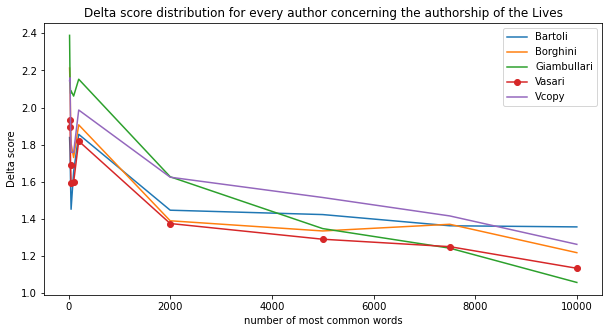

In [61]:
#plt.plot(k_list, values, marker='*')
#plt.title('Topic coherence values for different topic numbers')
#plt.xlabel('Number of topics')
#plt.ylabel('Coherence')


fig = plt.figure()


X = [20, 30, 40, 50, 100, 200, 2000, 5000, 7500, 10000] 


 #, 500, 1000


# Bartoli
Y1 = [1.838567213310585,1.7577106697854776,1.5905160467937012,1.4523928184962533, 1.6547129258282405, 1.8559837207812162, 1.447382305617218, 1.4238902538551055, 1.3635809672705872, 1.3574824743526004] 
plt.plot(X, Y1, label = "Bartoli") 

# Borghini
Y2 = [2.212588708509892, 2.1216984237448617, 1.9350455324941702, 1.8047511042785178, 1.7310287339170731, 1.9069649266433921, 1.3904418615732568, 1.3356429499408466, 1.3716397949147685, 1.218754065162964]
plt.plot(X, Y2, label = "Borghini") 

# Giambullari
Y3 = [2.3887643490055224, 2.134965208752774, 2.076301702793525, 2.089697790842044, 2.061855363803096, 2.1526371263687722, 1.6272694350761017, 1.3484106260054398, 1.2429869755393799, 1.0584340638156833]
plt.plot(X, Y3, label = "Giambullari") 

# Vasari
Y4 = [1.8931766640767909, 1.931615052520559, 1.6893137604038295, 1.591271219282905, 1.5978447600399246, 1.8195480012687923, 1.3756849118429249, 1.291135589191854, 1.2511525924497338, 1.134738413711443]
plt.plot(X, Y4, label = "Vasari", marker = "o") 

#Vcopy
Y5 = [2.1447275267148367, 2.16038276179463, 1.8748150015597838, 1.7585336358282706, 1.7595221289137672, 1.9867602944880658, 1.6250483882999922, 1.515776438240675, 1.4165442657836949, 1.2635989500315485]
plt.plot(X, Y5, label = "Vcopy") 



  
# Labeling the X-axis 
plt.xlabel('number of most common words') 
# Labeling the Y-axis 
plt.ylabel('Delta score') 
# Give a title to the graph
plt.title('Delta score distribution for every author concerning the authorship of the Lives') 
  
# Show a legend on the plot 
plt.legend() 
plt.show()
#plt.rcParams["figure.figsize"] = (10,5)

#plt.figure.figsize(14,6)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)


t1 = np.arange(0.0, 3.0, 0.01)

ax1 = plt.subplot(212)
ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax1.plot(t1, f(t1))

ax2 = plt.subplot(221)
ax2.margins(2, 2)           # Values >0.0 zoom out
ax2.plot(t1, f(t1))
ax2.set_title('Zoomed out')

ax3 = plt.subplot(222)
ax3.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
ax3.plot(t1, f(t1))
ax3.set_title('Zoomed in')

plt.show()

https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axes_margins.html#sphx-glr-gallery-subplots-axes-and-figures-axes-margins-py

# Observation

the bigger the set of .most common words, the closer Vasari himself to the biographies, in parallel Giambullari is catching up

big rise between 100 and 200

What kind of words are these words which causing this change? 

How big is the set in total? 



In [22]:
#whole_corpus_freq_dist[:300]

[('che', 12468),
 ('e', 9651),
 ('di', 8122),
 ('a', 5428),
 ('non', 4553),
 ('et', 4087),
 ('la', 4058),
 ('per', 3770),
 ('il', 3570),
 ('in', 3050),
 ('io', 2962),
 ('l', 2370),
 ('si', 2316),
 ('è', 2312),
 ('mi', 2212),
 ('le', 1931),
 ('con', 1928),
 ('vostra', 1818),
 ('vi', 1757),
 ('ho', 1742),
 ('se', 1676),
 ('da', 1612),
 ('al', 1527),
 ('del', 1462),
 ('perché', 1360),
 ('mio', 1267),
 ('gli', 1262),
 ('ha', 1240),
 ('come', 1229),
 ('questo', 1215),
 ('un', 1212),
 ('della', 1188),
 ('sua', 1160),
 ('signor', 1132),
 ('voi', 1112),
 ('più', 1110),
 ('messer', 1076),
 ('de', 1019),
 ('ma', 952),
 ('o', 944),
 ('lo', 927),
 ('ne', 927),
 ('una', 913),
 ('tutto', 897),
 ('giorgio', 875),
 ('molto', 869),
 ('cosa', 858),
 ('questa', 831),
 ('signoria', 798),
 ('i', 776),
 ('cose', 765),
 ('d', 764),
 ('me', 758),
 ('magnifico', 752),
 ('quel', 740),
 ('bene', 733),
 ('altro', 723),
 ('alla', 716),
 ('eccellenza', 715),
 ('quella', 707),
 ('vostro', 688),
 ('ci', 686),
 ('sono', 650),
 ('dio', 625),
 ('fatto', 611),
 ('quanto', 594),
 ('son', 594),
 ('far', 582),
 ('così', 575),
 ('delle', 569),
 ('suo', 568),
 ('vasari', 565),
 ('ogni', 541),
 ('sarà', 540),
 ('tanto', 534),
 ('sia', 531),
 ('quale', 496),
 ('mia', 495),
 ('illustrissima', 493),
 ('fare', 490),
 ('fiorenza', 485),
 ('nel', 451),
 ('né', 447),
 ('ora', 440),
 ('dove', 440),
 ('alli', 427),
 ('poi', 425),
 ('gran', 416),
 ('qui', 416),
 ('quando', 411),
 ('però', 403),
 ('s', 402),
 ('duca', 392),
 ('loro', 386),
 ('ch', 369),
 ('so', 366),
 ('chi', 353),
 ('dì', 350),
 ('sopra', 350),
 ('roma', 347),
 ('ancora', 332),
 ('opera', 330),
 ('costì', 327),
 ('fine', 321),
 ('uno', 319),
 ('quello', 319),
 ('questi', 319),
 ('già', 319),
 ('servitore', 315),
 ('nostro', 306),
 ('n', 304),
 ('ordine', 301),
 ('lui', 298),
 ('poco', 296),
 ('modo', 295),
 ('pur', 294),
 ('nella', 288),
 ('altra', 287),
 ('fa', 286),
 ('altri', 284),
 ('detto', 284),
 ('li', 282),
 ('parte', 282),
 ('stato', 282),
 ('tutti', 280),
 ('giovanni', 279),
 ('sì', 273),
 ('anche', 270),
 ('queste', 263),
 ('ella', 263),
 ('grazia', 261),
 ('prima', 257),
 ('assai', 255),
 ('qualche', 254),
 ('dire', 253),
 ('animo', 251),
 ('quelle', 251),
 ('dell', 250),
 ('può', 249),
 ('mano', 248),
 ('caro', 247),
 ('col', 246),
 ('egli', 245),
 ('esser', 244),
 ('san', 243),
 ('maestro', 243),
 ('casa', 241),
 ('signore', 236),
 ('sala', 234),
 ('credo', 232),
 ('avete', 232),
 ('altre', 231),
 ('qua', 227),
 ('tutte', 227),
 ('meglio', 227),
 ('senza', 222),
 ('altezza', 219),
 ('scudi', 219),
 ('fussi', 218),
 ('hanno', 215),
 ('mai', 213),
 ('aver', 212),
 ('alle', 212),
 ('dal', 211),
 ('fu', 211),
 ('intanto', 210),
 ('volta', 207),
 ('dico', 205),
 ('vorrei', 205),
 ('conto', 203),
 ('m', 203),
 ('pisa', 202),
 ('grande', 201),
 ('fino', 198),
 ('quali', 195),
 ('fra', 195),
 ('lettera', 192),
 ('ben', 191),
 ('luogo', 190),
 ('tutta', 188),
 ('don', 186),
 ('farò', 185),
 ('tempo', 184),
 ('illustrissimo', 184),
 ('forse', 181),
 ('acciò', 180),
 ('era', 179),
 ('mezzo', 179),
 ('va', 178),
 ('avendo', 178),
 ('essere', 177),
 ('principe', 177),
 ('solo', 176),
 ('dato', 173),
 ('resto', 172),
 ('vo', 171),
 ('vostre', 169),
 ('lei', 168),
 ('dua', 168),
 ('etc.', 168),
 ('sempre', 166),
 ('lettere', 166),
 ('scritto', 165),
 ('spedalingo', 165),
 ('sotto', 164),
 ('pure', 164),
 ('santità', 163),
 ('el', 163),
 ('secondo', 162),
 ('cavalier', 160),
 ('sano', 160),
 ('vero', 159),
 ('batista', 159),
 ('sta', 158),
 ('farà', 158),
 ('avessi', 157),
 ('tenpo', 157),
 ('virtù', 156),
 ('via', 156),
 ('presto', 155),
 ('auto', 155),
 ('francesco', 154),
 ('firenze', 152),
 ('amici', 152),
 ('possa', 152),
 ('siate', 150),
 ('ché', 148),
 ('avere', 148),
 ('degli', 147),
 ('arezzo', 147),
 ('all', 146),
 ('osservandissimo', 145),
 ('noi', 145),
 ('molte', 145),
 ('vincenzo', 144),
 ('insieme', 143),
 ('pare', 143),
 ('raccomando', 143),
 ('posso', 142),
 ('medesimo', 142),
 ('ser', 140),
 ('vedere', 139),
 ('vita', 139),
 ('tavola', 138),
 ('arò', 137),
 ('bisogna', 136),
 ('buona', 136),
 ('papa', 135),
 ('parole', 135),
 ('fo', 135),
 ('male', 135),
 ('que', 135),
 ('dello', 132),
 ('su', 132),
 ('oggi', 132),
 ('dalla', 131),
 ('abbia', 130),
 ('signori', 130),
 ('facci', 130),
 ('fratello', 129),
 ('santa', 129),
 ('senpre', 129),
 ('allo', 126),
 ('disegni', 126),
 ('disegnio', 126),
 ('dir', 125),
 ('finito', 124),
 ('anno', 124),
 ('storie', 124),
 ('state', 123),
 ('palazzo', 123),
 ('farei', 122),
 ('nelle', 122),
 ('dice', 122),
 ('reverendo', 122),
 ('mani', 121),
 ('due', 121),
 ('veggo', 120),
 ('santo', 118),
 ('ve', 117),
 ('chiesa', 117),
 ('borghini', 117),
 ('bisognio', 117),
 ('religione', 115),
 ('troppo', 115),
 ('vostri', 114),
 ('molti', 114),
 ('v', 114),
 ('par', 113),
 ('eccellentissimo', 113),
 ('buon', 112),
 ('qualcosa', 111),
 ('cardinale', 110),
 ('verso', 110),
 ('intorno', 110),
 ('sarò', 110),
 ('venire', 110),
 ('cioè', 109),
 ('sue', 109),
 ('cosimo', 108)]

In [24]:
#whole_corpus_freq_dist[4000:5000]

[('ragionarne', 4),
 ('doverrete', 4),
 ('parlerò', 4),
 ('esce', 4),
 ('partiti', 4),
 ('garbo', 4),
 ('rimase', 4),
 ('piacendoli', 4),
 ('operate', 4),
 ('gravità', 4),
 ('cortese', 4),
 ('buonarroto', 4),
 ('misterio', 4),
 ('risolver', 4),
 ('quadretto', 4),
 ('fussin', 4),
 ('piacevole', 4),
 ('mancherei', 4),
 ('piglassi', 4),
 ('oloferne', 4),
 ('considerando', 4),
 ('distendere', 4),
 ('innamorato', 4),
 ('bastassi', 4),
 ('empiere', 4),
 ('spedirò', 4),
 ('altissimo', 4),
 ('reputo', 4),
 ('generoso', 4),
 ('desiderrei', 4),
 ('mel', 4),
 ('saperrete', 4),
 ('ripieno', 4),
 ('sospeso', 4),
 ('allegrezze', 4),
 ('picture', 4),
 ('zefiro', 4),
 ('riposare', 4),
 ('qualcuna', 4),
 ('bozza', 4),
 ('cattività', 4),
 ('botte', 4),
 ('opinione', 4),
 ('similitudine', 4),
 ('drieto', 4),
 ('espresso', 4),
 ('considerar', 4),
 ('pictura', 4),
 ('acanto', 4),
 ('serbate', 4),
 ('rimasi', 4),
 ('seppi', 4),
 ('ongni', 4),
 ('tomerello', 4),
 ('visite', 4),
 ('legname', 4),
 ('pie', 4),
 ('vidi', 4),
 ('tornino', 4),
 ('imperatori', 4),
 ('miglor', 4),
 ('ragionamo', 4),
 ('medaglia', 4),
 ('potette', 4),
 ('angulo', 4),
 ('penserà', 4),
 ('ven', 4),
 ('riposarsi', 4),
 ('privilegio', 4),
 ('dura', 4),
 ('julio', 4),
 ('alias', 4),
 ('seu', 4),
 ('utili', 4),
 ('tibi', 4),
 ('aspettava', 4),
 ('mellino', 4),
 ('altrettanti', 4),
 ('copie', 4),
 ('attendo', 4),
 ('rivedere', 4),
 ('purgare', 4),
 ('batte', 4),
 ('ringraziarvi', 4),
 ('compagno', 4),
 ('altoviti', 4),
 ('succede', 4),
 ('cavando', 4),
 ('uccelli', 4),
 ('averci', 4),
 ('minerbetti', 4),
 ('xiiii', 4),
 ('conseguire', 4),
 ('fedele', 4),
 ('truova', 4),
 ('strani', 4),
 ('gusci', 4),
 ('inscrizione', 4),
 ('fidei', 4),
 ('commisso', 4),
 ('abbiano', 4),
 ('tirari', 4),
 ('berna', 4),
 ('frontone', 4),
 ('particino', 4),
 ('ulive', 4),
 ('ancona', 4),
 ('rimetterò', 4),
 ('vere', 4),
 ('pien', 4),
 ('dialogo', 4),
 ('debole', 4),
 ('succederà', 4),
 ('porge', 4),
 ('sepultura', 4),
 ('guasti', 4),
 ('rimane', 4),
 ('servissi', 4),
 ('m.', 4),
 ('fassi', 4),
 ('servizi', 4),
 ('publica', 4),
 ('conte', 4),
 ('isabella', 4),
 ('salutare', 4),
 ('guarderò', 4),
 ('comuni', 4),
 ('andatevi', 4),
 ('guardate', 4),
 ('darci', 4),
 ('guasto', 4),
 ('figluoli', 4),
 ('straordinaria', 4),
 ('crocifissaio', 4),
 ('potessimo', 4),
 ('scarsità', 4),
 ('cristiano', 4),
 ('penserei', 4),
 ('replicato', 4),
 ('febbraio', 4),
 ('trovò', 4),
 ('subietto', 4),
 ('perpetuamente', 4),
 ('dedicata', 4),
 ('crocifissione', 4),
 ('obbedire', 4),
 ('ispedirmi', 4),
 ('significare', 4),
 ('luce', 4),
 ('lunetta', 4),
 ('sapienza', 4),
 ('visione', 4),
 ('rendere', 4),
 ('entra', 4),
 ('bere', 4),
 ('rifare', 4),
 ('parlereno', 4),
 ('poder', 4),
 ('conveniente', 4),
 ('staia', 4),
 ('fitti', 4),
 ('dolere', 4),
 ('avanzo', 4),
 ('interesso', 4),
 ('troppi', 4),
 ('terrete', 4),
 ('conoscessi', 4),
 ('materie', 4),
 ('spedirà', 4),
 ('infermità', 4),
 ('sapranno', 4),
 ('brevi', 4),
 ('paruto', 4),
 ('capacie', 4),
 ('seguente', 4),
 ('tolga', 4),
 ('trattenere', 4),
 ('reni', 4),
 ('esprimer', 4),
 ('sapeva', 4),
 ('eletto', 4),
 ('istò', 4),
 ('variare', 4),
 ('qualch', 4),
 ('petto', 4),
 ('presta', 4),
 ('tadda', 4),
 ('seravezza', 4),
 ('calculo', 4),
 ('leviate', 4),
 ('molt', 4),
 ('lieva', 4),
 ('materna', 4),
 ('ir', 4),
 ('diletta', 4),
 ('mill', 4),
 ('ordinata', 4),
 ('giornate', 4),
 ('fondata', 4),
 ('giardino', 4),
 ('mirabil', 4),
 ('protezione', 4),
 ('quadra', 4),
 ('motti', 4),
 ('affetionatissimo', 4),
 ('galletto', 4),
 ('ricordino', 4),
 ('contentava', 4),
 ('mei', 4),
 ('parendovi', 4),
 ('tacere', 4),
 ('piaceva', 4),
 ('dee', 4),
 ('mutato', 4),
 ('sacco', 4),
 ('camini', 4),
 ('sculture', 4),
 ('pregandovi', 4),
 ('portava', 4),
 ('biagio', 4),
 ('tenervi', 4),
 ('verisimile', 4),
 ('traverso', 4),
 ('ritirato', 4),
 ('liberi', 4),
 ('soglio', 4),
 ('purità', 4),
 ('sollecitano', 4),
 ('avevamo', 4),
 ('felicita', 4),
 ('durerà', 4),
 ('avertite', 4),
 ('mdlxvi', 4),
 ('catafalco', 4),
 ('noto', 4),
 ('donò', 4),
 ('genova', 4),
 ('undici', 4),
 ('operi', 4),
 ('du', 4),
 ('pirro', 4),
 ('troverà', 4),
 ('iudit', 4),
 ('bernardetto', 4),
 ('mattoni', 4),
 ('fanciulla', 4),
 ('corso', 4),
 ('francioso', 4),
 ('provato', 4),
 ('tira', 4),
 ('urbino', 4),
 ('raguagliato', 4),
 ('chiugga', 4),
 ('dipositeria', 4),
 ('restate', 4),
 ('seguirà', 4),
 ('antichità', 4),
 ('salita', 4),
 ('ecetto', 4),
 ('paulino', 4),
 ('ambrosio', 4),
 ('stilicone', 4),
 ('lodò', 4),
 ('terrà', 4),
 ('appoggio', 4),
 ('cittadino', 4),
 ('fiero', 4),
 ('saputa', 4),
 ('procurato', 4),
 ('puntormo', 4),
 ('raccomandassi', 4),
 ('miracolosa', 4),
 ('stufa', 4),
 ('ottava', 4),
 ('letterina', 4),
 ('assetto', 4),
 ('disfare', 4),
 ('dimostra', 4),
 ('agevolmente', 4),
 ('militaris', 4),
 ('milizia', 4),
 ('comandare', 4),
 ('damigelle', 4),
 ('attenda', 4),
 ('disagi', 4),
 ('dolgo', 4),
 ('rispondo', 4),
 ('silenzio', 4),
 ('intaglio', 4),
 ('ragionerò', 4),
 ('godervi', 4),
 ('alloghi', 4),
 ('sedici', 4),
 ('doverranno', 4),
 ('gravare', 4),
 ('bernardino', 4),
 ('custodia', 4),
 ("ch'ella", 4),
 ('salderà', 4),
 ('diciotto', 4),
 ('guidacci', 4),
 ('aportatore', 4),
 ('nanni', 4),
 ('xxvi', 4),
 ('viaggi', 4),
 ('bisogniò', 4),
 ('udito', 4),
 ('mostrarvi', 4),
 ('ecc.', 4),
 ('stanpacie', 4),
 ('restato', 4),
 ('tra', 4),
 ('pile', 4),
 ('è.', 4),
 ('orechi', 4),
 ('portai', 4),
 ('aviserà', 4),
 ('gianbatista', 4),
 ('scriverli', 4),
 ('remunerazione', 4),
 ('disegniata', 4),
 ('basciandoli', 4),
 ('mdlviiii', 4),
 ('accenni', 4),
 ('racconcia', 4),
 ('maggiormente', 4),
 ('risolvo', 4),
 ('caccia', 4),
 ('seguitano', 4),
 ('zoppo', 4),
 ('concini', 4),
 ('stento', 4),
 ('mdl', 4),
 ('gnien', 4),
 ('smarriti', 4),
 ('nichie', 4),
 ('tabernacoli', 4),
 ('istudio', 4),
 ('ardente', 4),
 ('suto', 4),
 ('sostegnio', 4),
 ('passioni', 4),
 ('soprali', 4),
 ('guardando', 4),
 ('terrestre', 4),
 ('bocche', 4),
 ('ricordandoli', 4),
 ('restando', 4),
 ('orvieto', 4),
 ('sassetta', 4),
 ('divinissimo', 4),
 ('ecellenti', 4),
 ('artifici', 4),
 ('informato', 4),
 ('basciar', 4),
 ('saperrà', 4),
 ('goderla', 4),
 ('scolpito', 4),
 ('portarvi', 4),
 ('rispondono', 4),
 ('concessi', 4),
 ('acursio', 4),
 ('oferto', 4),
 ('amò', 4),
 ('piglierà', 4),
 ('presti', 4),
 ('servirla', 4),
 ('dispiaciuto', 4),
 ('pescie', 4),
 ('bracciano', 4),
 ('fulignio', 4),
 ('condussono', 4),
 ('recato', 4),
 ('ste', 4),
 ('scusi', 4),
 ('riceuti', 4),
 ('consumare', 4),
 ('some', 4),
 ('provede', 4),
 ('alloggio', 4),
 ('spedendo', 4),
 ('cottimo', 4),
 ('mancarò', 4),
 ('bini', 4),
 ("ch'io", 4),
 ('nasciere', 4),
 ('gravi', 4),
 ('raccomandare', 4),
 ('informi', 4),
 ('ogniun', 4),
 ('saren', 4),
 ('lasso', 4),
 ('quindici', 4),
 ('sonetti', 4),
 ('disperato', 4),
 ('diavolo', 4),
 ('viiii', 4),
 ('apostolo', 4),
 ('tormi', 4),
 ('lasciai', 4),
 ('navicellaio', 4),
 ('lucigniano', 4),
 ('romano', 4),
 ('baldini', 4),
 ('meni', 4),
 ('ufizii', 4),
 ("d'arezzo", 4),
 ('avergli', 4),
 ('dessidererebbe', 4),
 ('gori', 4),
 ('polvere', 4),
 ('rivederla', 4),
 ('muli', 4),
 ('alzar', 4),
 ('assegniamento', 4),
 ('mettino', 4),
 ('lapis', 4),
 ('datelo', 4),
 ('satiffatto', 4),
 ('raccomandiano', 4),
 ('salgano', 4),
 ('cesis', 4),
 ('maffeo', 4),
 ('pesi', 4),
 ('pompa', 4),
 ('lunghezze', 4),
 ('conmesso', 4),
 ('arivare', 4),
 ('luminoso', 4),
 ('mila', 4),
 ('ciè', 4),
 ('intenderà', 4),
 ('ricolte', 4),
 ('appieno', 4),
 ('conmesse', 4),
 ('aparato', 4),
 ('insegnie', 4),
 ('splendor', 4),
 ('dorato', 4),
 ('nocie', 4),
 ('toglie', 4),
 ('travagliar', 4),
 ('nanzi', 4),
 ('omnes', 4),
 ('fanciulle', 4),
 ('faren', 4),
 ('valle', 4),
 ('eron', 4),
 ('grossezza', 4),
 ('comoda', 4),
 ('lista', 4),
 ('r', 4),
 ('rose', 4),
 ('finì', 4),
 ('procuri', 4),
 ('ogniora', 4),
 ('arcivescovo', 4),
 ('quaranta', 4),
 ('deliberare', 4),
 ('tribolata', 4),
 ('acenni', 4),
 ('basciato', 4),
 ('tenghino', 4),
 ('ganbe', 4),
 ('pontificato', 4),
 ('dimanda', 4),
 ('brescia', 4),
 ('facciasi', 4),
 ('funmo', 4),
 ('signior', 4),
 ('perfettamente', 4),
 ('molestarla', 4),
 ('excellenza', 4),
 ('progenitori', 4),
 ('benefizi', 4),
 ('lassar', 4),
 ('portano', 4),
 ('spirituale', 4),
 ('fè', 4),
 ('bargello', 4),
 ('afectione', 4),
 ('stanpe', 4),
 ('suplicato', 4),
 ('porfidi', 4),
 ('gloriosa', 4),
 ('veniano', 4),
 ('baldachino', 4),
 ('scomodo', 4),
 ('pili', 4),
 ('tuto', 4),
 ('rocco', 4),
 ('ruosi', 4),
 ('quattordici', 4),
 ('esaia', 4),
 ('acque', 4),
 ('confinato', 3),
 ('afflitto', 3),
 ('arrivata', 3),
 ('satisfaccino', 3),
 ('imperadore', 3),
 ('prudentemente', 3),
 ('sponsalizio', 3),
 ('stanca', 3),
 ('lauro', 3),
 ('magnanimità', 3),
 ('fareli', 3),
 ('quercia', 3),
 ('riposassi', 3),
 ('cacciata', 3),
 ('vt', 3),
 ('bacino', 3),
 ('mercurio', 3),
 ('fuga', 3),
 ('intenderei', 3),
 ('iudizio', 3),
 ('europa', 3),
 ('castrazione', 3),
 ('creare', 3),
 ('elementi', 3),
 ('creato', 3),
 ('genitali', 3),
 ('gittò', 3),
 ('possibilità', 3),
 ('concilio', 3),
 ('potenzie', 3),
 ('severità', 3),
 ('triompho', 3),
 ('confessione', 3),
 ('fondo', 3),
 ('elevato', 3),
 ('quinta', 3),
 ('corone', 3),
 ('apparissi', 3),
 ('nugole', 3),
 ('tagliati', 3),
 ('ragioneremo', 3),
 ('fateli', 3),
 ('mettersi', 3),
 ('virtute', 3),
 ('giovanetto', 3),
 ('servitori', 3),
 ('percioché', 3),
 ('seppe', 3),
 ('suona', 3),
 ('prigioni', 3),
 ('ali', 3),
 ('palma', 3),
 ('zuffa', 3),
 ('providenzia', 3),
 ('ab', 3),
 ('velluto', 3),
 ('matrona', 3),
 ('ingegneri', 3),
 ('inimici', 3),
 ('marte', 3),
 ('moltitudine', 3),
 ('fuochi', 3),
 ('nudo', 3),
 ('furore', 3),
 ('sonando', 3),
 ('nachere', 3),
 ('significato', 3),
 ('padrona', 3),
 ('selve', 3),
 ('erbe', 3),
 ('produce', 3),
 ('abondanzia', 3),
 ('chiamata', 3),
 ('scuro', 3),
 ('primavera', 3),
 ('ambe', 3),
 ('sottile', 3),
 ('valetevi', 3),
 ('fanghi', 3),
 ('esito', 3),
 ('ricordiate', 3),
 ('vedesti', 3),
 ('fatale', 3),
 ('cosaccie', 3),
 ('colpi', 3),
 ('storpiati', 3),
 ('pena', 3),
 ('essendomi', 3),
 ('incominciato', 3),
 ('fronte', 3),
 ('sicut', 3),
 ('ita', 3),
 ('homines', 3),
 ('lassa', 3),
 ('sentenzia', 3),
 ('beato', 3),
 ('pregovi', 3),
 ('palazo', 3),
 ('felici', 3),
 ('cavallino', 3),
 ('ragionammo', 3),
 ('serviranno', 3),
 ('mandatavi', 3),
 ('prua', 3),
 ('cercherò', 3),
 ('caminar', 3),
 ('maximo', 3),
 ('scemando', 3),
 ('crescono', 3),
 ('eserciti', 3),
 ('morta', 3),
 ('stracca', 3),
 ('liberazione', 3),
 ('rossa', 3),
 ('presentassi', 3),
 ('intendessi', 3),
 ('fareste', 3),
 ('ghirlanda', 3),
 ('arrivare', 3),
 ('volle', 3),
 ('coperta', 3),
 ('assedio', 3),
 ('cremona', 3),
 ('approvato', 3),
 ('valse', 3),
 ('morendo', 3),
 ('parente', 3),
 ('verdi', 3),
 ('crescere', 3),
 ('amalato', 3),
 ('conclusione', 3),
 ('gola', 3),
 ('degnità', 3),
 ('galante', 3),
 ('perduto', 3),
 ('prontissimo', 3),
 ('occorso', 3),
 ('dolersi', 3),
 ('guastar', 3),
 ('accettar', 3),
 ('rimedii', 3),
 ('amandovi', 3),
 ('ordinerete', 3),
 ('tornarvene', 3),
 ('preservarvi', 3),
 ('scrivevo', 3),
 ('lietamente', 3),
 ('ottimi', 3),
 ('costano', 3),
 ('intagliati', 3),
 ('vedendomi', 3),
 ('ricordassi', 3),
 ('godo', 3),
 ('scoppio', 3),
 ('strasordinario', 3),
 ('grandeza', 3),
 ('volendomi', 3),
 ('voglion', 3),
 ('dolcemente', 3),
 ('conversazione', 3),
 ('servirli', 3),
 ('tedesco', 3),
 ('raccomandomi', 3),
 ('maravigliate', 3),
 ('adietro', 3),
 ('bono', 3),
 ('strutto', 3),
 ('tarda', 3),
 ('lascerà', 3),
 ('superata', 3),
 ('vincere', 3),
 ('omnia', 3),
 ('azzurri', 3),
 ('avrete', 3),
 ('decembre', 3),
 ('martelli', 3),
 ('satisfarete', 3),
 ('legger', 3),
 ('seguirò', 3),
 ('satisfattissimo', 3),
 ('temete', 3),
 ('paro', 3),
 ('arrivato', 3),
 ('destinato', 3),
 ('indugiato', 3),
 ('finirlo', 3),
 ('mandarli', 3),
 ('coda', 3),
 ('immortale', 3),
 ('azurri', 3),
 ('avisare', 3),
 ('veli', 3),
 ('bisognato', 3),
 ('medoro', 3),
 ('giocondissima', 3),
 ('incominciata', 3),
 ('entrerrò', 3),
 ('ingrossar', 3),
 ('chiesti', 3),
 ('consolare', 3),
 ('consigliato', 3),
 ('rispondetemi', 3),
 ('trovano', 3),
 ('costò', 3),
 ('servita', 3),
 ('riverenzia', 3),
 ('ordinarii', 3),
 ('mandativi', 3),
 ('vederle', 3),
 ('rispondete', 3),
 ('essequie', 3),
 ('tornarmene', 3),
 ('avesti', 3),
 ('eroi', 3),
 ('fili', 3),
 ('dicevi', 3),
 ('cervelli', 3),
 ('guadagni', 3),
 ('disegnando', 3),
 ('partirsi', 3),
 ('attenenti', 3),
 ('doppia', 3),
 ('adoperate', 3),
 ('desideroso', 3),
 ('bona', 3),
 ('mostrarli', 3),
 ('coperte', 3),
 ('magno', 3),
 ('raccomandiamo', 3),
 ('affanni', 3),
 ('doglia', 3),
 ('intagliare', 3),
 ('accusate', 3),
 ('uccellato', 3),
 ('pregai', 3),
 ('bassi', 3),
 ('prove', 3),
 ('volendone', 3),
 ('compagni', 3),
 ('frutte', 3),
 ('ridotta', 3),
 ('stupenda', 3),
 ('distender', 3),
 ('lodare', 3),
 ('pesci', 3),
 ('remi', 3),
 ('chiamano', 3),
 ('rispondendo', 3),
 ('femine', 3),
 ('finto', 3),
 ('albero', 3),
 ('basciano', 3),
 ('volea', 3),
 ('incominciate', 3),
 ('venissino', 3),
 ('veneziani', 3),
 ('fateci', 3),
 ('burla', 3),
 ('acerbo', 3),
 ('battezzare', 3),
 ('convenga', 3),
 ('sicurissimo', 3),
 ('intervenga', 3),
 ('indirizzi', 3),
 ('fini', 3),
 ('confortato', 3),
 ('sorelle', 3),
 ('figliuola', 3),
 ('tributo', 3),
 ('ripari', 3),
 ('sù', 3),
 ('polizze', 3),
 ('mirabile', 3),
 ('intenebrata', 3),
 ('sente', 3),
 ('volgo', 3),
 ('negligenzia', 3),
 ('piglerebbe', 3),
 ('dat', 3),
 ('credessi', 3),
 ('dividere', 3),
 ('fugge', 3),
 ('combattere', 3),
 ('metterebbe', 3),
 ('accommoda', 3),
 ('quinti', 3),
 ('spigoli', 3),
 ('consolo', 3),
 ('volerlo', 3),
 ('cammini', 3),
 ('consiglare', 3),
 ('negoziarla', 3),
 ('medico', 3),
 ('ingannare', 3),
 ('corti', 3),
 ('andarci', 3),
 ('facili', 3),
 ('saluto', 3),
 ('porci', 3),
 ('assolutamente', 3),
 ('monasterii', 3),
 ('indirizzo', 3),
 ('increscie', 3),
 ('muovo', 3),
 ('orecchi', 3),
 ('conservare', 3),
 ('ideo', 3),
 ('guglielmo', 3),
 ('sonmi', 3),
 ('desinar', 3),
 ('comparazione', 3),
 ('riuscita', 3),
 ('perdona', 3),
 ('naso', 3),
 ('promette', 3),
 ("ch'el", 3),
 ('architettor', 3),
 ('buonora', 3),
 ('addosso', 3),
 ('grand', 3),
 ('invidie', 3),
 ('fondamenti', 3),
 ('fermò', 3),
 ('avvisato', 3),
 ('sottoposte', 3),
 ('occorrere', 3),
 ('maiestà', 3),
 ('granai', 3),
 ('franco', 3),
 ('volevi', 3),
 ('rilieva', 3),
 ('crudele', 3),
 ('niuna', 3),
 ('disegnar', 3),
 ('armadii', 3),
 ('provincie', 3),
 ('germania', 3),
 ('graziosa', 3),
 ('mantenere', 3),
 ('novelle', 3),
 ('giotto', 3),
 ('copiosa', 3),
 ('aggiugnervi', 3),
 ('gallo', 3),
 ('tasso', 3),
 ('filosofia', 3),
 ('dottrina', 3),
 ('passatempo', 3),
 ('solitudine', 3),
 ('duriate', 3),
 ('mdlxiiii', 3),
 ('qualunque', 3),
 ('celo', 3),
 ('accrescimento', 3),
 ('nobile', 3),
 ('mettermi', 3),
 ('nobilissimi', 3),
 ('facilitare', 3),
 ('rene', 3),
 ('cavalcar', 3),
 ('starmi', 3),
 ('perle', 3),
 ('staranno', 3),
 ('ogn', 3),
 ('ritrovar', 3),
 ('leggo', 3),
 ('uom', 3),
 ('amaro', 3),
 ('rapporto', 3),
 ('piovuto', 3),
 ('guadagno', 3),
 ('sadisfare', 3),
 ('largamente', 3),
 ('occorrenzie', 3),
 ('dormito', 3),
 ('accomodato', 3),
 ('edificato', 3),
 ('apparve', 3),
 ('paressino', 3),
 ('contrasegni', 3),
 ('aggiugnessi', 3),
 ('fuggir', 3),
 ('nave', 3),
 ('consideriate', 3),
 ('verrebbono', 3),
 ('crederei', 3),
 ('giustissimo', 3),
 ('apparisca', 3),
 ('termina', 3),
 ('travagliata', 3),
 ('longobardi', 3),
 ('dichiarassi', 3),
 ('dipigne', 3),
 ('gusti', 3),
 ('disgrazie', 3),
 ('dimandare', 3),
 ('passasse', 3),
 ('mula', 3),
 ('seguissi', 3),
 ('dipintore', 3),
 ('sommi', 3),
 ('propio', 3),
 ('quietamente', 3),
 ('garbata', 3),
 ('riguardo', 3),
 ('concistoro', 3),
 ('accadrà', 3),
 ('pensiamo', 3),
 ('adamo', 3),
 ('pagolo', 3),
 ('minuto', 3),
 ('rimandare', 3),
 ('pose', 3),
 ('rimarrà', 3),
 ('sospetti', 3),
 ('perdonatemi', 3),
 ('suocero', 3),
 ('bonsi', 3),
 ('veggendo', 3),
 ('amorevolmente', 3),
 ('mantenercelo', 3),
 ('adirato', 3),
 ('accadere', 3),
 ('bisognassino', 3),
 ('sapersi', 3),
 ('appartenenti', 3),
 ('mostrargli', 3),
 ('picoli', 3),
 ('abbracciate', 3),
 ('sostengono', 3),
 ('alloro', 3),
 ('ambedue', 3),
 ('arebbono', 3),
 ('fatemi', 3),
 ('iulio', 3),
 ('essendosi', 3),
 ('impedimento', 3),
 ('priori', 3),
 ('b.', 3),
 ('cum', 3),
 ('quem', 3),
 ('regimen', 3),
 ('hospitalis', 3),
 ('etiam', 3),
 ('dicti', 3),
 ('ipsum', 3),
 ('nos', 3),
 ('alia', 3),
 ('sub', 3),
 ('quo', 3),
 ('hospitale', 3),
 ('eius', 3),
 ('tenore', 3),
 ('an', 3),
 ('assicurato', 3),
 ('congregazione', 3),
 ('datogli', 3),
 ('buio', 3),
 ('interrotto', 3),
 ('divisa', 3),
 ('numeri', 3),
 ('rifatta', 3),
 ('riavermi', 3),
 ('giudichi', 3),
 ('epitafii', 3),
 ('significata', 3),
 ('avendoci', 3),
 ('proemio', 3),
 ('monasterio', 3),
 ('accompagnati', 3),
 ('speco', 3),
 ('tessitore', 3),
 ('miglorando', 3),
 ('tornava', 3),
 ('domane', 3),
 ('fanciulli', 3),
 ('gentilmente', 3),
 ('chieggo', 3),
 ('dimestichezza', 3),
 ('quantumque', 3),
 ('tenete', 3),
 ('ottenere', 3),
 ('presidente', 3),
 ('mercanti', 3),
 ('vogl', 3),
 ('bindo', 3),
 ('dirla', 3),
 ('mera', 3),
 ('stetti', 3),
 ('potetti', 3),
 ('patisce', 3),
 ('savi', 3),
 ('comunque', 3),
 ('chiamò', 3),
 ('meritamente', 3),
 ('are', 3),
 ('quadrino', 3),
 ('starne', 3),
 ('principii', 3),
 ('tardo', 3),
 ('ragguagliato', 3),
 ('parea', 3),
 ('portiate', 3),
 ('mandatami', 3),
 ('perficiebat', 3)]